<a href="https://colab.research.google.com/github/mariatomy9/DSPLAB/blob/master/28February.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft,ifft

[1. 3. 6. 6. 5. 3.]


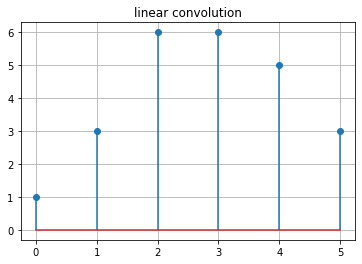

In [ ]:
1.

#linear convolution
def lin_convolution(x,h):
    M= len(x)
    N = len(h)
       
    if M!=N:
        if M>N:
            h= np.append(h,np.zeros(M-N))   
        else :
            x = np.append(x,np.zeros(N-M))
    K= max(N,M)
    y= np.zeros(N+M-1)
        
    for i in range(len(y)):
      if i<M:
        for j in range(i+1):
              y[i]+=x[j]*h[i-j]
      elif i>=M:
        for j in range(K-1,i-K,-1):
              y[i]+=x[j]*h[i-j]
        
    return y[:N+M-1]

x=np.array([1,2,3])
h = np.array([1,1,1,1])
print(lin_convolution(x,h))
plt.stem(lin_convolution(x,h), use_line_collection = True)
plt.title("linear convolution")
plt.grid(True)
plt.show()




In [ ]:
2.
h=[2,1,0.5]
X=list(map(complex,input().split(' ')))
x=np.array(X)
print(x)
z=np.convolve(np.convolve(np.convolve(x,h),h),h)
print(z)

1 1+1j 1
[1.+0.j 1.+1.j 1.+0.j]
[ 8.    +0.j    20.    +8.j    32.   +12.j    31.   +12.j
 22.    +7.j    10.75  +3.j     3.875 +0.75j   0.875 +0.125j
  0.125 +0.j   ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


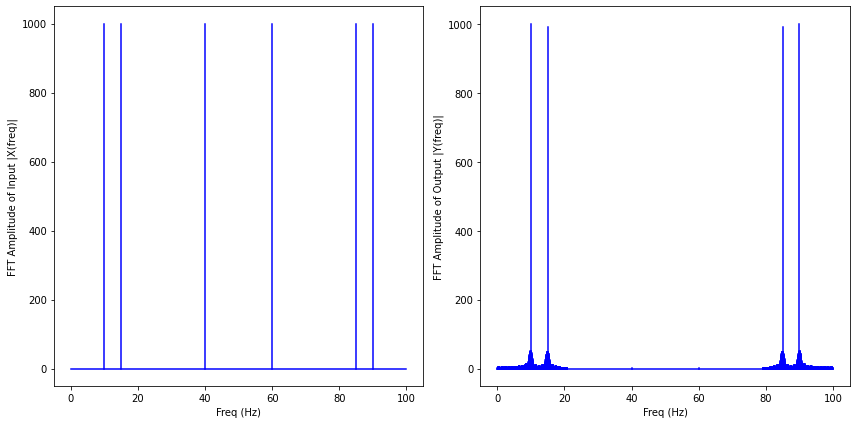

In [2]:
3.
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

def sinc_filter(M, fc):
	"""Return an M + 1 point symmetric point sinc kernel with normalised cut-off 
    		frequency fc 0->0.5."""
	if M%2:
		raise Exception('M must be odd')
	return np.sinc(2*fc*(np.arange(M + 1) - M/2))

def hamming(M,a):
	"""Return an M + 1 point symmetric hamming window."""
	if M%2:
		raise Exception('M must be odd')
	return a - (1-a)*np.cos(2*np.pi*np.arange(M + 1)/M)

def build_filter(M, fc, a, window=None):
	"""Construct filter using the windowing method for filter parameters M
	number of taps, cut-off frequency fc and window. Window defaults to None 
	i.e. a rectangular window."""
	if window is None:
		h = sinc_filter(M, fc)
	else:
		h = sinc_filter(M, fc)*window(M,a)
	return h/h.sum()


ts = 0.01 # i.e. sampling frequency is 1/ts = 100Hz
sr = 1/ts
x = np.arange(-10, 10, ts)
signal = (np.sin(20*np.pi*x) + np.cos(30*np.pi*x) + 
                np.sin(80*np.pi*x))

#build up some filters
#Low pass
M = 100 #number of taps in filter
fc = 0.2 
a = 0.35 #also do for a=0.54
ham_lp = build_filter(M, fc, a, window=hamming)
y_ham = np.convolve(signal, ham_lp)

X = fft(signal)
Nx = len(X)
n = np.arange(Nx)
T = Nx/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude of Input |X(freq)|')

Y=fft(y_ham)
Ny = len(Y)
n = np.arange(Ny)
T = Ny/sr
freq = n/T 

plt.subplot(122)
plt.stem(freq, abs(Y), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude of Output |Y(freq)|')
plt.tight_layout()
plt.show()

[ 3. -1.  2.  2.  0.  1.]


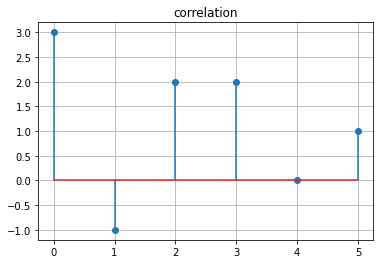

In [ ]:
4.
#correlation
import numpy as np
import matplotlib.pyplot as plt
def correlation(x,h):
    M= len(x)
    N = len(h)
       
    if M!=N:
        if M>N:
            h= np.append(h,np.zeros(M-N))   
        else :
            x = np.append(x,np.zeros(N-M))
    K= max(N,M)
    y= np.zeros(len(x)+len(h)-1)
    h= h[::-1]
    
        
    for i in range(len(y)):
      if i<M:
        for j in range(i+1):
              y[i]+=x[j]*h[i-j]
      elif i>=M:
        for j in range(K-1,i-K,-1):
              y[i]+=x[j]*h[i-j]
              
    if len(h)>N or len(x)>M:
      return y[(abs(N-M))::]
    else:
      return y

x=np.array([3,2,1,1])
h = np.array([1,-1,1])
print(correlation(x,h))
plt.stem(correlation(x,h), use_line_collection = True)
plt.title("correlation")
plt.grid(True)

plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


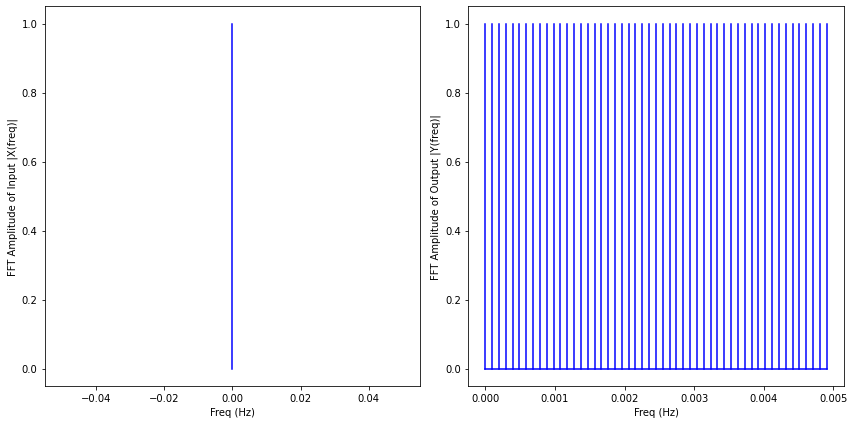

In [4]:
5.
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

def sinc_filter(M, fc):
  """Return an M + 1 point symmetric point sinc kernel with normalised cut-off
  frequency fc 0->0.5."""
  if M%2:
    raise Exception('M must be odd')
  return np.sinc(2*fc*(np.arange(M + 1) - M/2))

def hamming(M):
  """Return an M + 1 point symmetric hamming window."""
  if M%2:
    raise Exception('M must be odd')
  return 0.54 - 0.46*np.cos(2*np.pi*np.arange(M + 1)/M)

def build_filter(M, fc, window=None):
	"""Construct filter using the windowing method for filter parameters M
	number of taps, cut-off frequency fc and window. Window defaults to None 
	i.e. a rectangular window."""
	if window is None:
		h = sinc_filter(M, fc)
	else:
		h = sinc_filter(M, fc)*window(M)
	return h/h.sum()



ts = 200 
sr = 1/ts
x = np.arange(-10, 10, ts)
signal = np.sin(20*np.pi*x) + np.cos(30*np.pi*x) + np.sin(80*np.pi*x)

#build up some filters
#Low pass
M = 50 #do for M=80 and 100
fc = 50 
ham_lp = build_filter(M, fc, window=hamming)
y_ham = np.convolve(signal, ham_lp)

X = fft(signal)
Nx = len(X)
n = np.arange(Nx)
T = Nx/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude of Input |X(freq)|')

Y=fft(y_ham)
Ny = len(Y)
n = np.arange(Ny)
T = Ny/sr
freq = n/T 

plt.subplot(122)
plt.stem(freq, abs(Y), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude of Output |Y(freq)|')
plt.tight_layout()
plt.show()

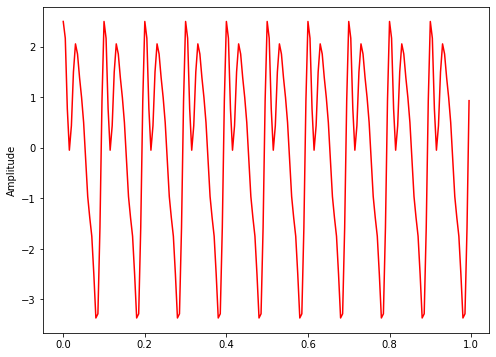

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


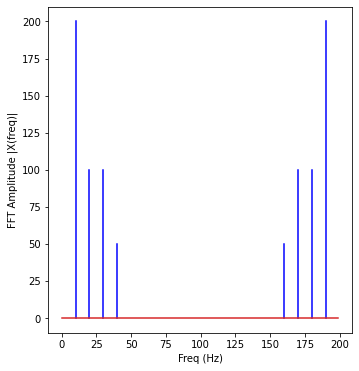

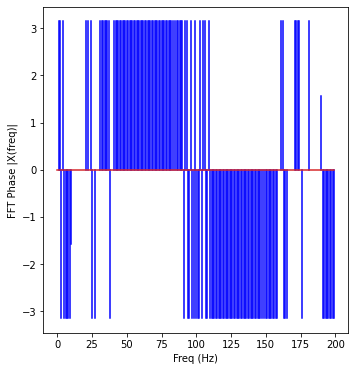

In [ ]:
6.
def dft(arr):
  N=len(arr)
  X=np.zeros(N,dtype=complex)
  W=np.exp((-1j*2*np.pi)/N)
  for k in np.arange(N):
      for n in np.arange(N):
          X[k]+=arr[n]*W**(n*k)
  return np.round(X)
# sampling rate
fs = 200
# sampling interval
ts = 1.0/fs
t = np.arange(0,1,ts)

freq = 1.
x = 2*np.sin(20*np.pi*freq*t)+ np.cos(40*np.pi*freq*t)+np.cos(60*np.pi*freq*t)+0.5*np.cos(80*np.pi*freq*t)


plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.show()

# Compute FFT of x
X=dft(x)

# calculate the frequency
N = len(X)
k = np.arange(N)
T = N/fs
freq = k/T  
#magnitude plot
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b',markerfmt=" ")#, basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

#phase plot
plt.figure(figsize = (12,6))
plt.subplot(121)
plt.stem(freq,np.angle(X), 'b',markerfmt=" ")#, basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Phase |X(freq)|')

plt.show()

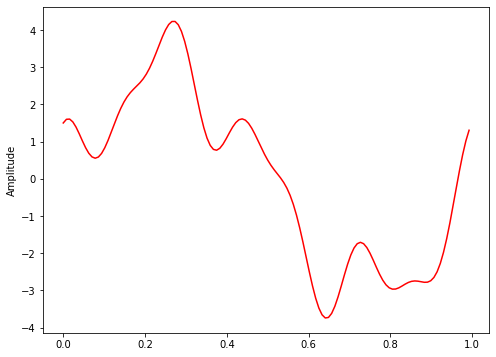

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


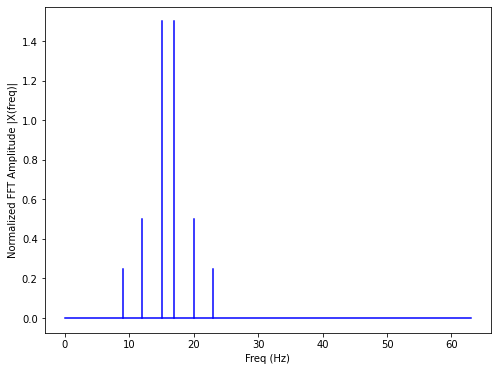

In [ ]:
7.
def dft(arr):
  N=len(arr)
  X=np.zeros(N,dtype=complex)
  W=np.exp((-1j*2*np.pi)/N)
  for k in np.arange(N):
      for n in np.arange(N):
          X[k]+=arr[n]*W**(n*k)
  return np.round(X)
# sampling rate
fs = 128
# sampling interval
ts = 1.0/fs
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.cos(2*np.pi*freq*t)

freq = 7
x += 0.5* np.cos(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.show()

y=x*np.cos(32*np.pi*t)
# Compute FFT of x
Y=dft(y)

# calculate the frequency
N = len(Y)
k = np.arange(N)
T = N/fs
freq = k/T  


# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
Y_oneside =Y[:n_oneside]/n_oneside

plt.figure(figsize = (8, 6))
plt.stem(f_oneside, abs(Y_oneside), 'b',markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')

plt.show()

In [ ]:
8.
def circular_convolution(x, h):
    M= len(x)
    N = len(h)
       
    if M!=N:
        if M>N:
            h= np.append(h,np.zeros(M-N))   
        else :
            x = np.append(x,np.zeros(N-M))
    u=idft(np.multiply(dft(x),dft(h)))
        
    return u

def dft(arr):
  N=len(arr)
  X=np.zeros(N,dtype=complex)
  W=np.exp((-1j*2*np.pi)/N)
  for k in np.arange(N):
      for n in np.arange(N):
          X[k]+=arr[n]*W**(n*k)
  return np.round(X)

def idft(arr1):
    N=len(arr1)
    X=np.zeros(N,dtype=complex)
    W=np.exp((1j*2*np.pi)/N)
    for k in np.arange(N):
        for n in np.arange(N):
            X[k]+=(arr1[n]*W**(n*k))/N
    return np.round(X)

x1=[1,2,3,4]
x2=[1,-1]
print(circular_convolution(x1,x2))


[-3.+0.j  1.-0.j  1.-0.j  1.-0.j]


In [ ]:
9.
def dft(arr):
  N=len(arr)
  X=np.zeros(N,dtype=complex)
  W=np.exp((-1j*2*np.pi)/N)
  for k in np.arange(N):
      for n in np.arange(N):
          X[k]+=arr[n]*W**(n*k)
  return np.round(X)
x=[1,1+1j,-1,1-1j]
e=np.dot(x,x)

print(e)
print((np.dot(dft(x),dft(x)))/(len(x)*3))

(2+0j)
(2+0j)


In [ ]:
#Overlap-save method
import numpy as np
from scipy.fft import fft, ifft

x=[3,-1,0,1,3,2,0,1,2,1]
T=len(x)
h=[1,1,1]
M=len(h)      
y=[]

h=np.append(h,np.zeros(M-1))
x=np.append(x,np.zeros(M-T%M))

b=int(np.ceil(T/M)) #Total No of blocks

for i in np.arange(b):
  if i==0:
    xi=np.append(np.zeros(M-1),x[0:M])
  else:
    xi=x[i*M-(M-1):(i+1)*M]

  yn=ifft(fft(xi)*fft(h)) #finding convolution
  yi=yn[M-1:2*M-1]
  y=np.append(y,yi)

if len(y)>len(x):
  y = y[:len(x)] #discarding extra points if any
print("By overlap save, x(n)*h(n)=",np.real(y))

By overlap save, x(n)*h(n)= [3. 2. 2. 0. 4. 6. 5. 3. 3. 4. 3. 1.]


In [ ]:
np.convolve([3,-1,0,1,3,2,0,1,2,1],[1,1,1])

array([3, 2, 2, 0, 4, 6, 5, 3, 3, 4, 3, 1])

In [ ]:
#Overlap-add method
import numpy as np
from scipy.fft import fft, ifft

x=[3,-1,0,1,3,2,0,1,2,1]
T=len(x)
h=[1,1,1]
M=len(h)      


h=np.append(h,np.zeros(M-1))
x=np.append(x,np.zeros(M-T%M))

b=int(np.ceil(T/M)) #Total No of blocks

y=np.zeros(T+M+1,dtype=complex)

for i in np.arange(b):
  xi=x[i*M:(i+1)*M]
  yn=np.append(xi,np.zeros(M-T%M))
  y1=np.round(ifft(fft(yn)*fft(h)))#finding convolution
  y[i*M:(i+1)*M+(M-T%M)]+=y1


if len(y)>len(x):
  y = y[:len(x)] #discarding extra points if any
print('By overlap add, x(n)*h(n)=',np.real(y))



By overlap add, x(n)*h(n)= [3. 2. 2. 0. 4. 6. 5. 3. 3. 4. 3. 1.]


In [ ]:
12.
'''
#include <dsk6713.h>
#include <dsk6713_led.h>
#include <dsk6713_dip.h>
void main()
{
/* Initialize the board support library, must be first BSL call */ DSK6713_init();

   		 /* Initialize the LED and DIP switch modules of the BSL */
    		DSK6713_LED_init();
    		DSK6713_DIP_init();

    		while(1)
    		{
        		/* Toggle LED #2 */
        		DSK6713_LED_toggle(2);

/* Check DIP switch #3 and light LED #1 accordingly, */
//0 = switch pressed 
        		if (DSK6713_DIP_get(3) == 0)
            		/* Switch pressed, turn LED #3 on */
            			DSK6713_LED_on(1);
        		else
            		/* Switch not pressed, turn LED #3 off */
            			DSK6713_LED_off(1);

        		/* Spin in a software delay loop for about 200ms */
        		DSK6713_waitusec(200000);
    		}
}
'''

In [ ]:
13.
'''
#include <stdio.h>
void conv(float *x, float *h, float *y, short l, short m);
void main()
{
    float x[] = { 1, 2, 3, 4 };
    float h[] = { 1, 1, 1 };
    float y[6]; //length of y = L+M-1
    short n;
    conv(x, h, y, 4, 3);
    for (n = 0; n < 6; n++)
        printf("%.2f ", y[n]);
}

void conv(float *x, float *h, float *y, short l, short m)
{
    short k, kmin, kmax, n;
    for (n = 0; n < l + m - 1; n++)
    {
        y[n] = 0;
        kmin = (n > l - 1) ? n - l + 1 : 0;
        kmax = (n > m - 1) ? m - 1 : n;
        //printf("%d %d\n", kmin, kmax);
        for (k = kmin; k <= kmax; k++)
        {
            y[n] = y[n] + h[k] * x[n - k];

        }

    }

}
'''

In [ ]:
14
'''
#include <dsk6713.h>
#include <dsk6713_led.h>
#include <dsk6713_dip.h>
void main()
{
/* Initialize the board support library, must be first BSL call */ DSK6713_init();

   		 /* Initialize the LED and DIP switch modules of the BSL */
    		DSK6713_LED_init();
    		DSK6713_DIP_init();

    		while(1)
    		{
        		/* Toggle LED #3 */
        		DSK6713_LED_toggle(3);

/* Check DIP switch #2 and light LED #2 accordingly, */
//0 = switch pressed 
        		if (DSK6713_DIP_get(2) == 0)
            		/* Switch pressed, turn LED #3 on */
            			DSK6713_LED_on(2);
        		else
            		/* Switch not pressed, turn LED #3 off */
            			DSK6713_LED_off(2);

        		/* Spin in a software delay loop for about 200ms */
        		DSK6713_waitusec(200000);
    		}
}
'''